# Researching historical video game data

**Purpose of the study**

- Explore the games represented in the data
- Identify patterns that determine the success of the game
- Test dependency hypotheses

**Brief report:**

Retrieved data from the games.csv file. Data presented up to 2016 from open access and was checked for missing values, errors in data types and names, and implicit duplicates.

Data was processed and a new column, sum_sales, was added to calculate the success of the game in the global market.

Data analysis was carried out. Sales by platform were studied and the current period was selected - from 2010. Feedback and impact on sales were considered. Various game genres and their attractiveness for investment are assessed.

Profiles of users from different regions have been compiled. The differences and similarities of markets are shown.

The proposed hypotheses have been tested with different outcomes.
## General information

In [1]:
import pandas as pd
from scipy import stats as st
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('D:\\Jupyter\\10. Summary project 1\\games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Data preprocessing
### Replacing column names

In [3]:
data = data.set_axis(data.columns.str.lower(),axis='columns')
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Data type conversion

In [4]:
data['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

tbd in user_score can be safely raised to None; this will not change our results, since by definition there is no data.

The year of manufacture is a simple number, without commas. Let's replace it with int.

The ratings of critics and users will undoubtedly need to be compared, let's bring them to one form.

In [5]:
data['year_of_release'] = data.year_of_release.astype('Int64')
data['critic_score'] = data.critic_score / 10
data['user_score'] = pd.to_numeric(data.user_score, errors='coerce')
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Missing values
There are two missing values in name and genre (adjacent), let's remove them.

~350 missing values in year of release. Let's check the significance for the numerical values.

In [6]:
data = data.dropna(subset=['name'])
for column in data.columns:
    if data[column].dtypes == 'float64':
        print(column,data[data.year_of_release.isna()][column].mean() / data[column].mean())
sales_b = data['jp_sales'].mean()
sales_b

na_sales 0.8351181998364473
eu_sales 0.6269037794356105
jp_sales 0.320865576650605
other_sales 0.6760783835790006
critic_score 0.9799433161859437
user_score 0.9894120244424115


0.07762460360198647

Removong missing year_of_release cells will have the greatest impact on Japanese sales and will increase their average. But since this value is not critical, does not tend to zero and is not large, we can safely drop them

In [7]:
data = data.dropna(subset=['year_of_release'])
sales_a = data['jp_sales'].mean()
print(sales_a)
print(f'Japanese sales rose by {"%.1f" % (sales_a / sales_b * 100 - 100)} percent')

0.07848698613476039
Japanese sales rose by 1.1 percent


In [8]:
display(data['rating'].value_counts())

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

There are several small ESRB rating groups. Let's replace them with the ones closest in classification.

In [9]:
data.loc[(data['rating'] == 'K-A')|(data['rating'] =='EC'),'rating'] ='E'
data.loc[(data['rating'] == 'AO')|(data['rating'] =='RP'),'rating'] ='M'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [10]:
data['rating'] = data.rating.fillna('None')
data.duplicated().sum()

0

### Calculation of total sales

In [11]:
data['sum_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


**Overall:**

For most games, there are no ratings from critics and users. This may indicate the general poor quality of the data. There is also no rating in almost half of the cases.

Other minor issues have been fixed.

## Exploratory data analysis
### Game releases by year

<Axes: title={'center': 'Releases by year'}, xlabel='Year', ylabel='Releases'>

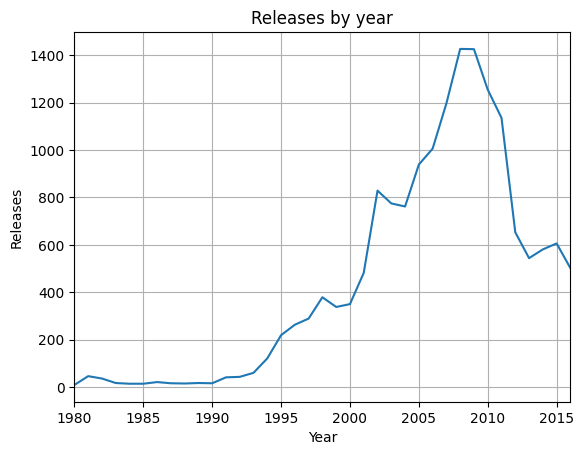

In [12]:
(
pd
 .pivot_table(data,
              index='year_of_release',
              values='sum_sales',
              aggfunc='count')
 .plot(title='Releases by year',
       grid=True,xlabel='Year',
       ylabel='Releases',
       legend=False,
       xlim=(1980,2016))
)


There is a general decline from ~2008 to the end of measurements. We can safely discard values up to 1995

### Sales by platform

'Top sales by platform'

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


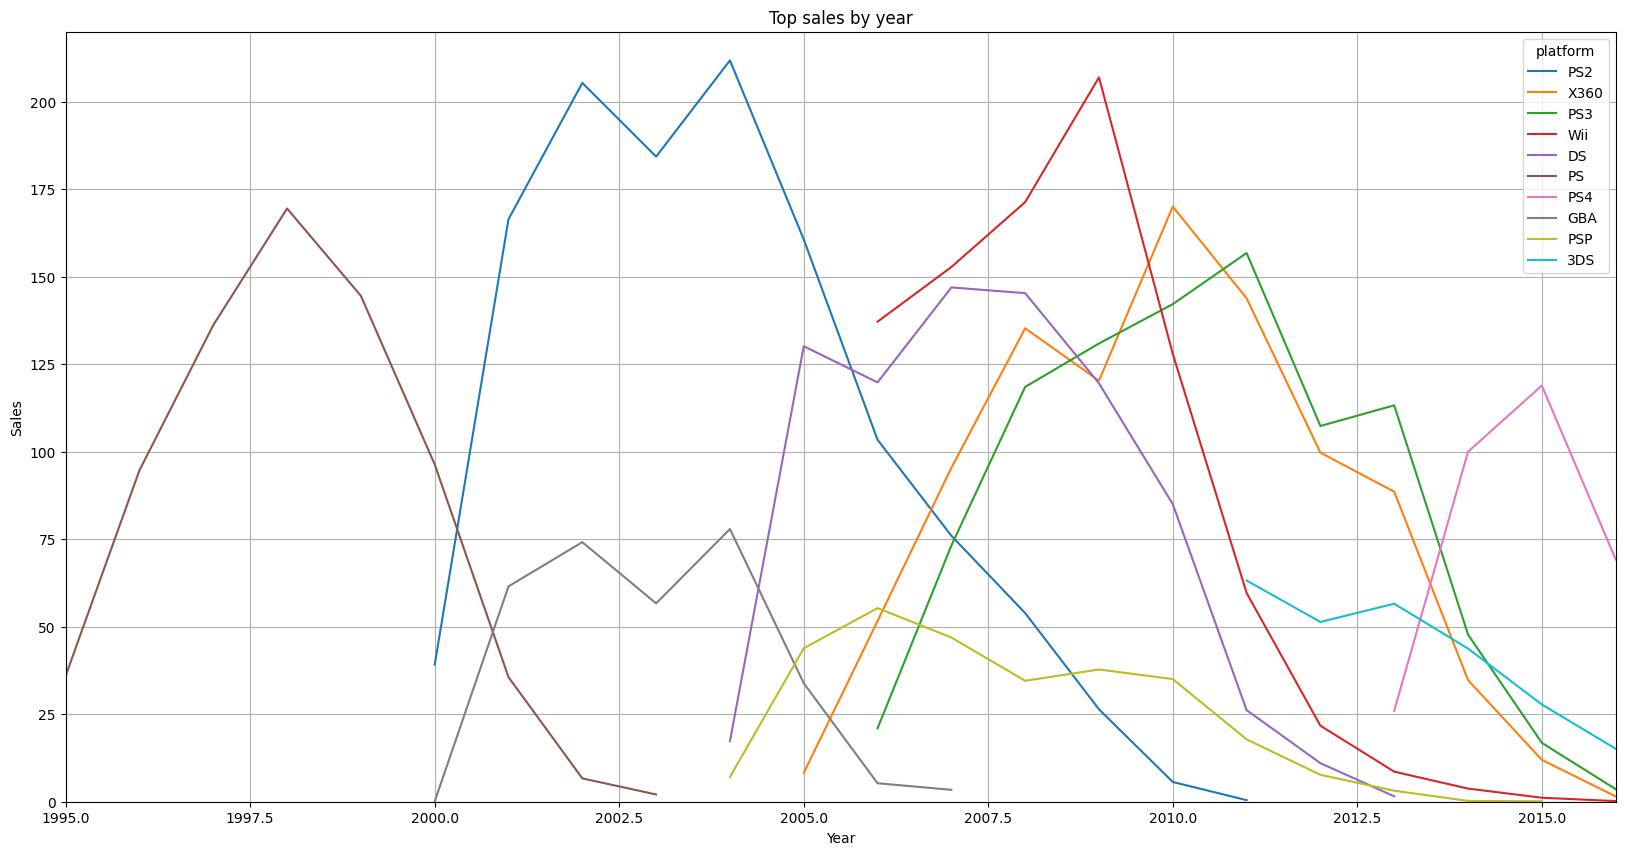

In [13]:
# function of obtaining the top n platforms according to various criteria
def get_top(min_year,n,values='sum_sales',aggfunc='sum'):
    return (
        pd.pivot_table(data[data['year_of_release'] > min_year],
                       index='platform',
                       values=values,
                       aggfunc=aggfunc)
        .sort_values(by=values,ascending=False).head(n)
    )

top_10_platforms = get_top(1995,10)
display('Top sales by platform',top_10_platforms)
(
pd
.pivot_table(data[data['platform'].isin(top_10_platforms.index)],
             index='year_of_release',
             columns='platform',
             values='sum_sales',
             aggfunc='sum')
.reindex(columns=top_10_platforms.index)
.plot(title='Top sales by year',
      grid=True,xlabel='Year',
      ylabel='Sales',
      figsize=(20,10),
      xlim=(1995,2016),
      ylim=(0,220))
);

Characteristic platform lifespan: ~7.5 years
### Sales by platform for the current period
Due to the fact that the data was obtained on a cross-section of 2016, uncertainty is created. It is unknown whether the drop in PS4 sales in 2016 can be attributed to the general decline observed in the first graph, or whether it is the influence of unsold games at the end of the year that were not included in the data. It would be easier to exclude 2016 from the year-by-year data.

The current period can be considered from 2013.

'Top sales by platform since 2013'

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


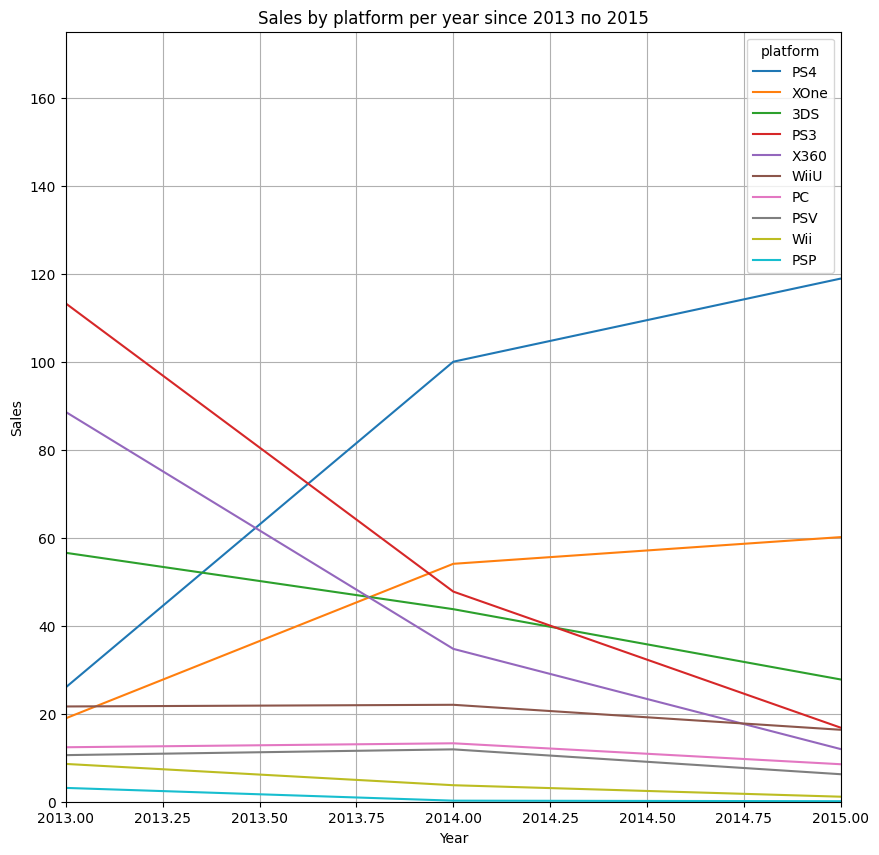

In [14]:
rel_year = 2013
top_10_platforms = get_top(rel_year,10)
display(f'Top sales by platform since {rel_year}',top_10_platforms)
(
pd
.pivot_table(data[data['platform'].isin(top_10_platforms.index)],
             index='year_of_release',
             columns='platform',
             values='sum_sales',
             aggfunc='sum')
.reindex(columns=top_10_platforms.index)
.plot(title=f'Sales by platform per year since {rel_year} по 2015',
      grid=True,
      xlabel='Year',
      ylabel='Sales',
      figsize=(10,10),
      xlim=(rel_year,2015),
      ylim=(0,175))
);

Against the background of the general decline, two platforms stand out: PS4, showing high growth, and XboxOne, also growing, but 2 times slower than PlayStation.

In [15]:
data = data.drop(data[data['year_of_release'] < rel_year].index)

### Game sales by platform, boxplot

<Axes: title={'center': 'Global game sales'}, ylabel='Sales'>

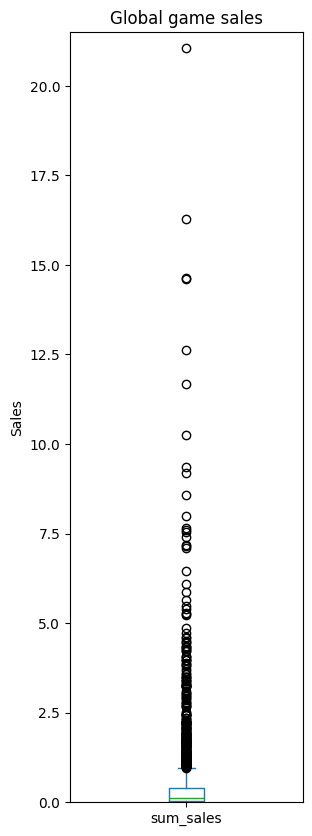

In [16]:
data.sum_sales.plot(title='Global game sales',kind='box',ylabel='Sales',figsize=(3,10),ylim=(0,21.5))

A large number of outliers are exclusives and game hits.

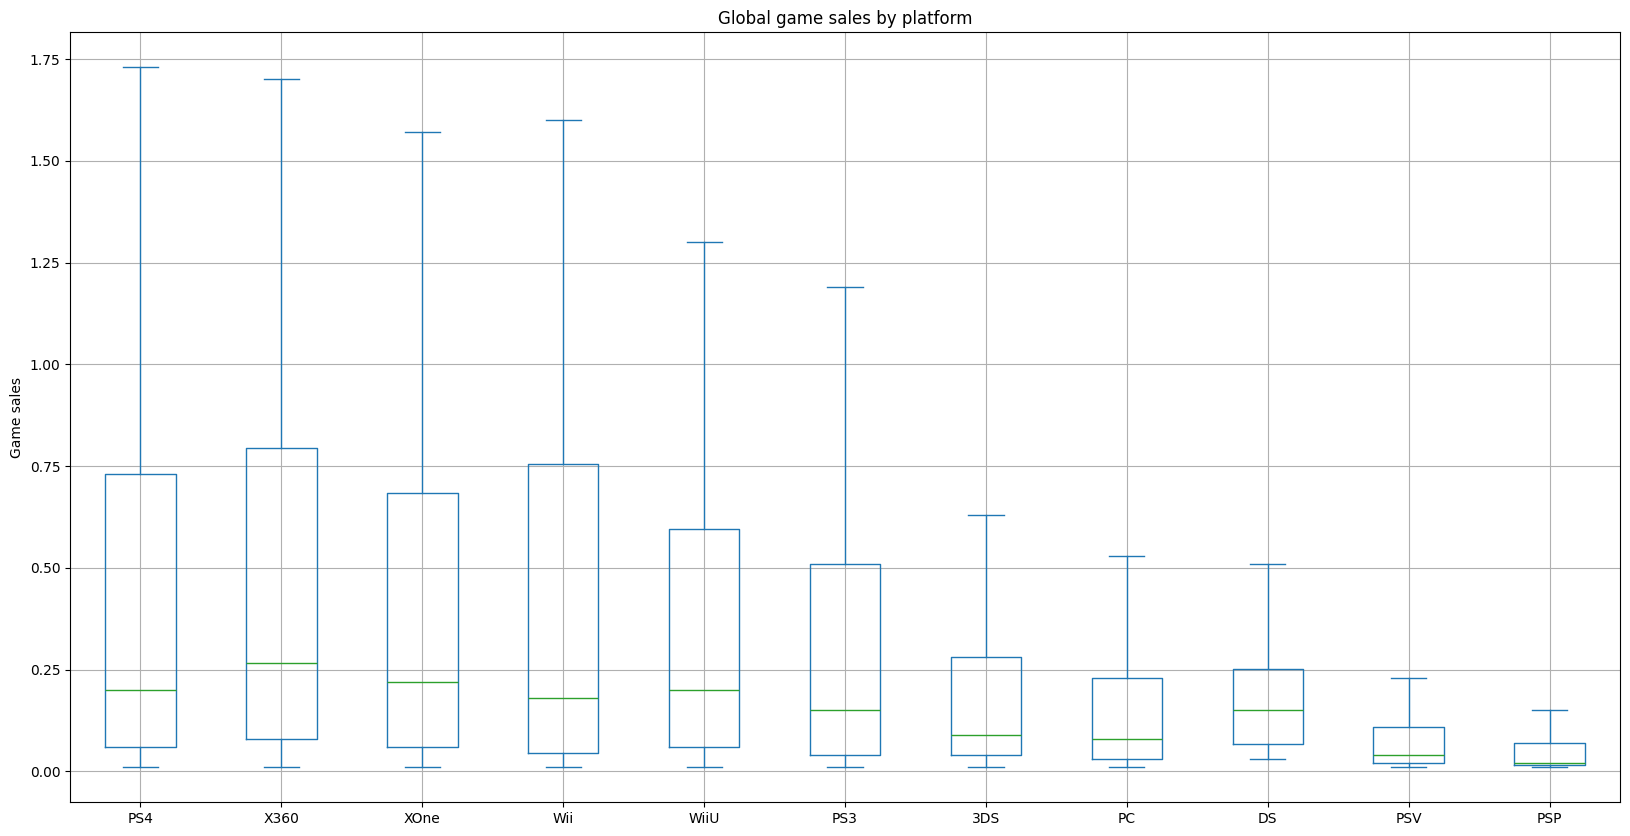

In [17]:
(
pd
.pivot_table(data,
             columns='platform',
             index='name',
             values='sum_sales')
.reindex(columns=get_top(0,20,'sum_sales','mean').index)
.plot(title='Global game sales by platform',
      figsize=(20,10),
      kind='box',
      ylabel='Game sales',
      showfliers=False,
      grid=True)
);

The platforms are sorted by descending average sales and some have medians larger than their neighbors on the left. Outliers raise the average without affecting the median.
### The impact of reviews from critics and users on sales
To derive the optimal value that covers the largest amount of data, we sort the platforms by the average share of games rated by players and critics.

'Highest average number of rated games by platform'

,critic_score,sum_sales,user_score,critic_scored,user_scored,av_scored
platform,,,,,,
PC,149,189,155,0.788360,0.820106,0.804233
XOne,169,247,182,0.684211,0.736842,0.710526
WiiU,70,115,80,0.608696,0.695652,0.652174


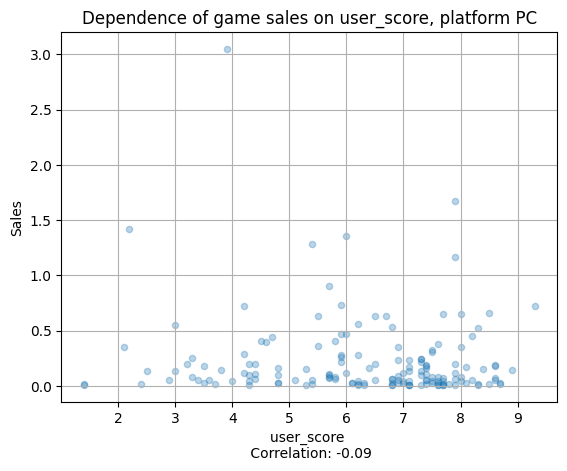

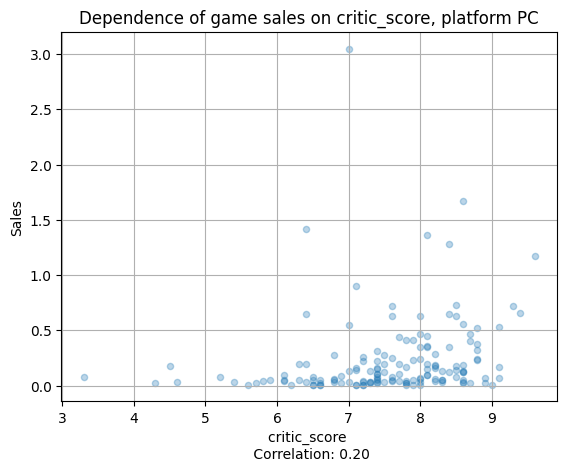

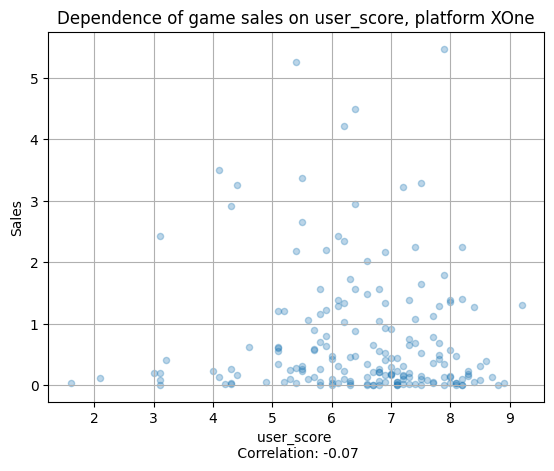

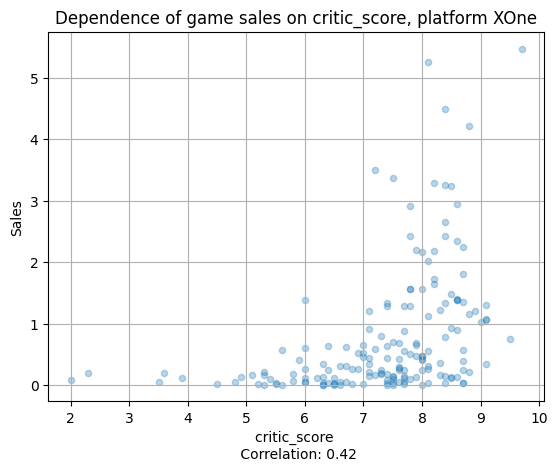

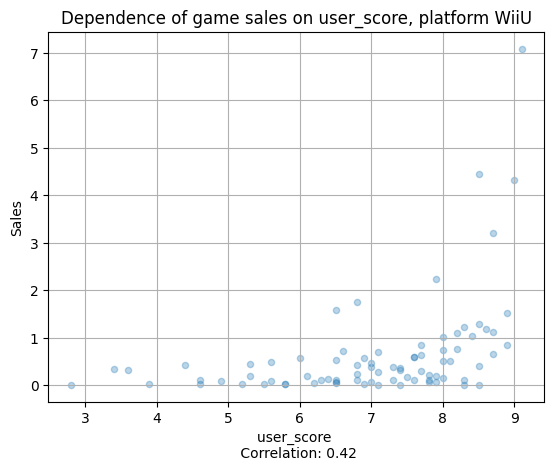

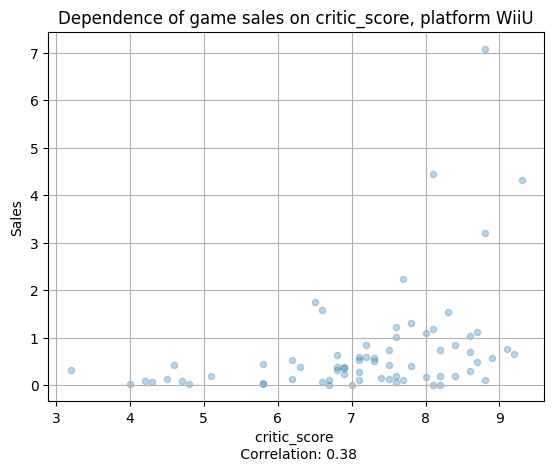

In [18]:
# looking for the highest average number of rated games by platform
total_scored = (pd
                .pivot_table(data,
                            index = 'platform',
                            values = ('sum_sales','critic_score','user_score'),
                            aggfunc = 'count')
                .assign(critic_scored=lambda x: x['critic_score'] / x['sum_sales'])
                .assign(user_scored=lambda x: x['user_score'] / x['sum_sales'])
                .assign(av_scored=lambda x: (x['critic_scored'] + x['user_scored'])/2)
                .sort_values(by='av_scored',ascending=False)
                .head(3))
display('Highest average number of rated games by platform',total_scored)
# building scatter plot by platform and evaluation type
for platform in total_scored.index:
    for score_type in ['user_score','critic_score']:
        corr = ( data[data['platform'] == platform][score_type]
                                                  .corr(data[data['platform'] == platform]['sum_sales']))
        data[data['platform'] == platform].plot(kind='scatter', 
              title=f'Dependence of game sales on {score_type}, platform {platform}',
              x=score_type, 
              y='sum_sales', 
              grid=True,
              alpha=0.3,
              xlabel=f'{score_type} \n Correlation: {"%.2f" % corr}',
              ylabel='Sales')

**Overall:** 

Correlation between critic reviews and sales shows a weak but significant relationship. User reviews, in turn, do not show any existing dependence, with exception of family friendly oriented WiiU. Critics are less likely to give bad reviews to popular games, while users are not restricted.
### Distribution of games by genre

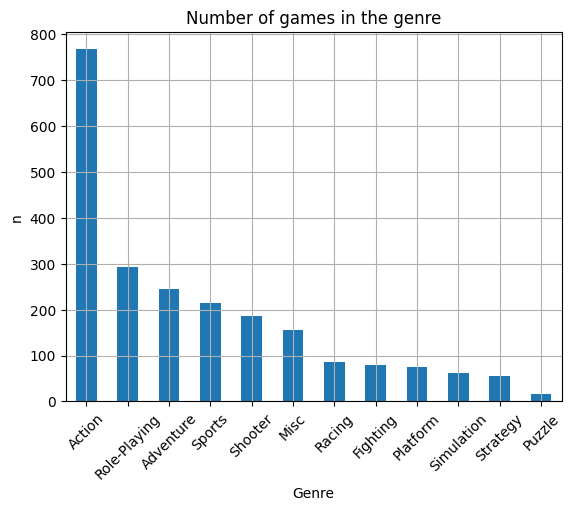

In [19]:
temp = (pd
 .pivot_table(data,
             index='genre',
             values='sum_sales',
             aggfunc='count')
 .sort_values(by='sum_sales',ascending=False)
 )
#display(temp)
temp.plot(kind='bar',
      y='sum_sales',
      title='Number of games in the genre',
      grid=True,
      rot=45,
      ylabel='n',
      legend=False,
      xlabel='Genre');

Action games are the most created.

Let's sort average sales against this dependence to get into the least populated market.

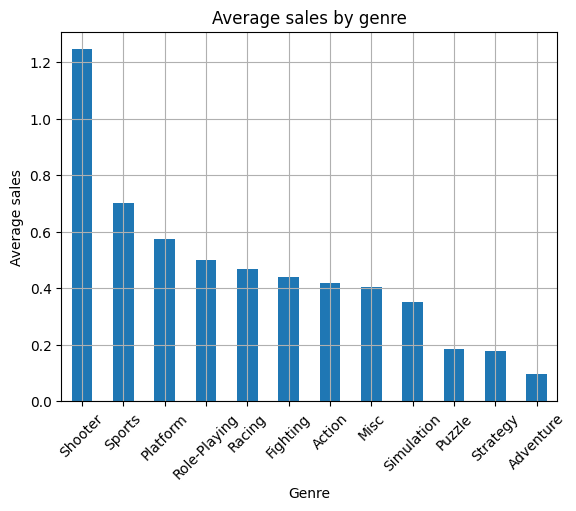

In [20]:
temp = (pd
 .pivot_table(data,
             index='genre',
             values='sum_sales',
             aggfunc=['sum','count','mean'])
 .sort_values(by=('mean', 'sum_sales'),ascending=False)
 )
temp.plot(kind='bar',
      y=('mean', 'sum_sales'),
      title='Average sales by genre',
      grid=True,
      rot=45,
      ylabel='Average sales',
      legend=False,
      xlabel='Genre');

Platforming is one of the more profitable genres and is also one of the smallest, which means the least competition.

Shooters are at the top in terms of average sales, followed sports games.

Action, with the highest market occupancy, is in the middle of profitability.

In [21]:
data[data['genre'] == 'Platform']['platform'].value_counts()

platform
WiiU    15
3DS     15
PS4     12
PS3      9
X360     6
PSV      6
XOne     5
Wii      2
DS       2
PC       2
Name: count, dtype: int64

Nintendo holds majority on platforming games
## User profile
### Platform popularity

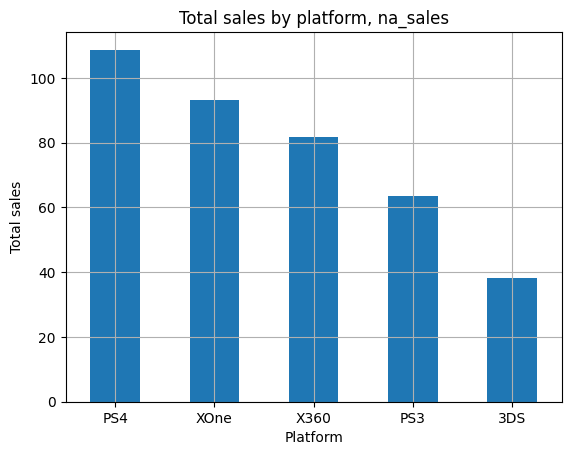

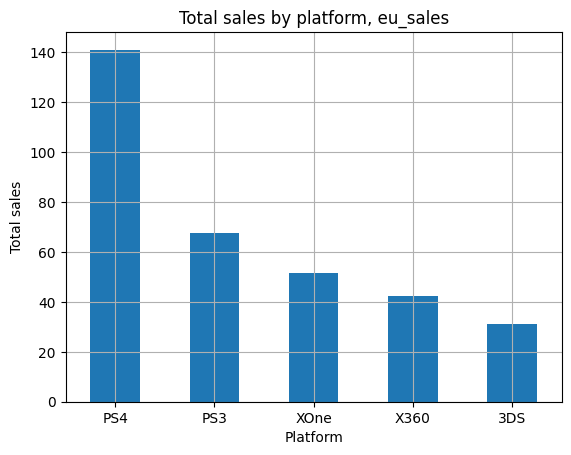

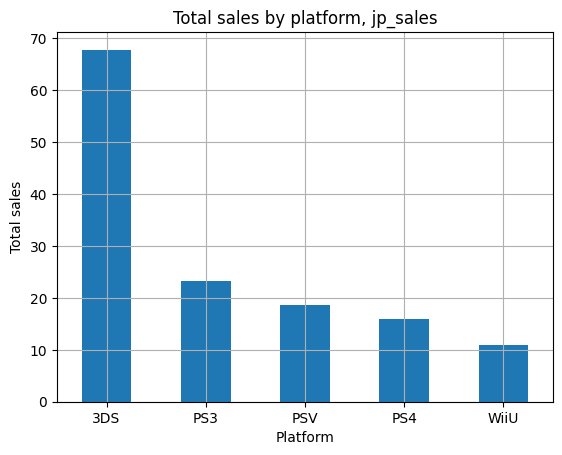

In [22]:
for region in ['na_sales','eu_sales','jp_sales']:
    temp = (
    pd.pivot_table(data,
              values=region,
              index='platform',
              aggfunc='sum')
        .sort_values(by=region,ascending=False)
        .head(5)
    )
    temp.plot(kind='bar',
      y=region,
      title=f'Total sales by platform, {region}',
      grid=True,
      legend=False,
      rot=0,
      ylabel='Total sales',
      xlabel='Platform')


In America, the newcomers PS4 and Xbox One are leading, with their previous generations following behind.

In Europe, PS4 leads by a wide margin, followed by PS3 and competitor Xbox One with Xbox 360.

In Japan, the 3DS leads by a wide margin, followed by the PlayStation line of platforms. The Xbox series is not represented.
### Popularity of genres

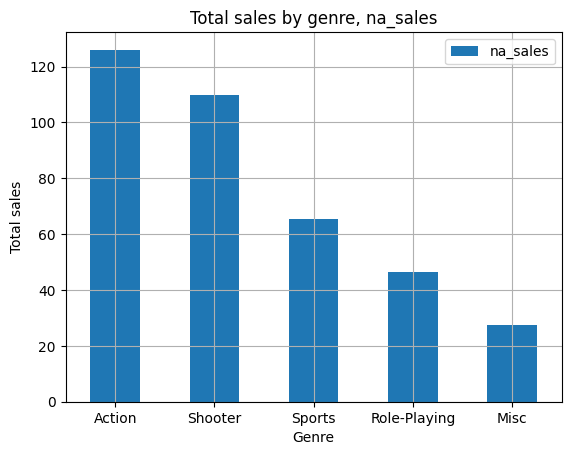

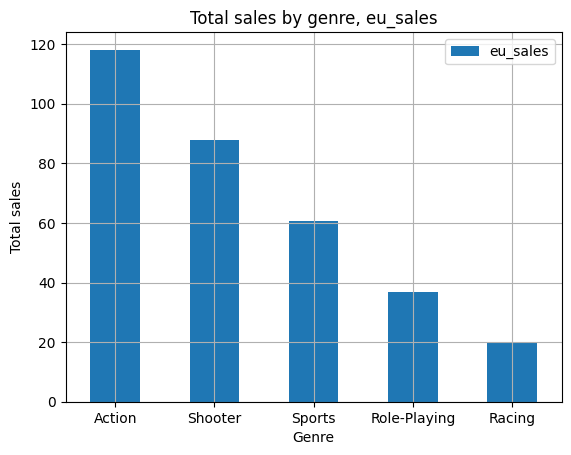

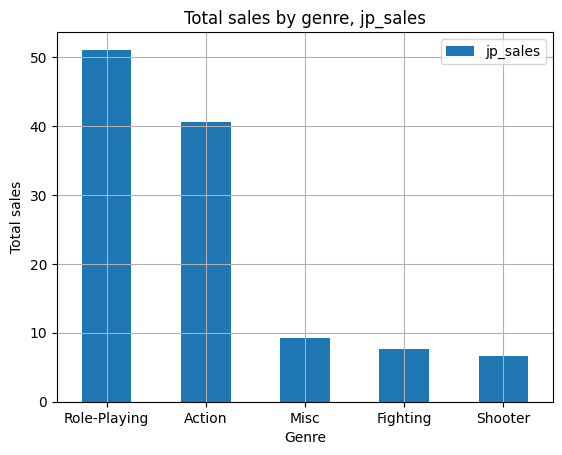

In [23]:
for region in ['na_sales','eu_sales','jp_sales']:
    temp = (
    pd.pivot_table(data,
              values=region,
              index='genre',
              aggfunc='sum')
        .sort_values(by=region,ascending=False)
        .head(5)
    )
    temp.plot(kind='bar',
      y=region,
      title=f'Total sales by genre, {region}',
      grid=True,
      rot=0,
      ylabel='Total sales',
      xlabel='Genre')

America and Europe practically do not differ in the top genres: action is in the lead, followed by shooter and sports. Role-play in the top 5.

In Japan, role-play and action are leading by a wide margin.
### Impact of ESRB rating

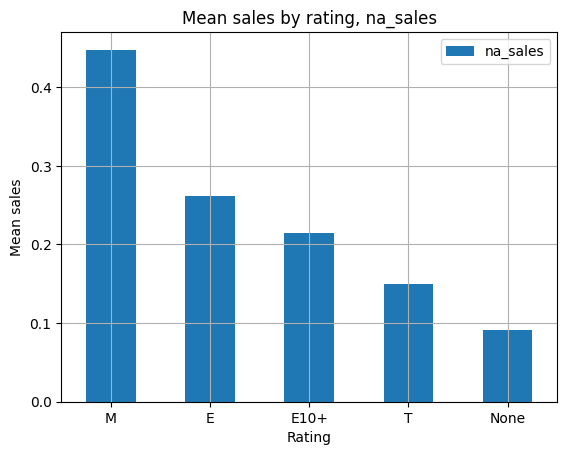

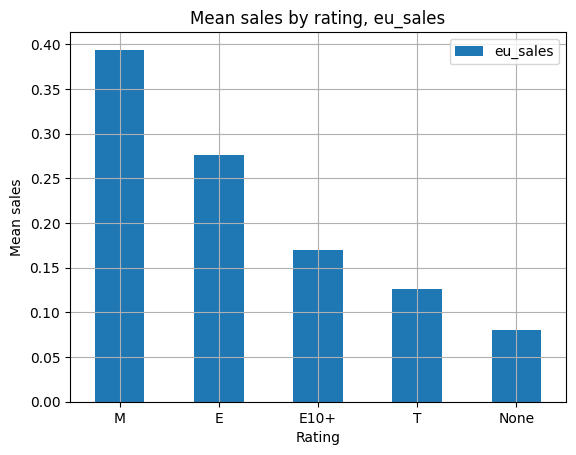

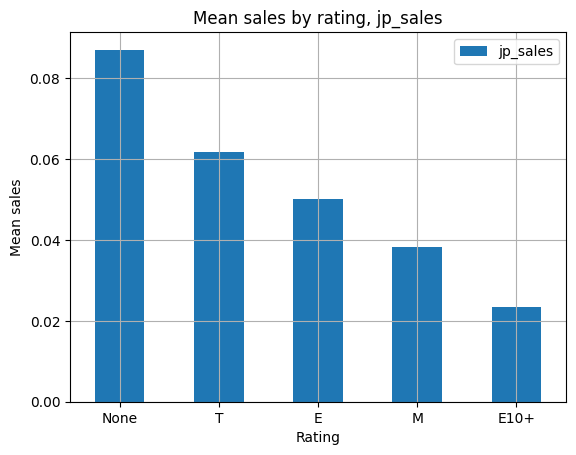

In [24]:
for region in ['na_sales','eu_sales','jp_sales']:
    temp = (
    pd.pivot_table(data,
              values=region,
              index='rating',
              aggfunc='mean')
        .sort_values(by=region,ascending=False)
        .head(5)
    )
    temp.plot(kind='bar',
      y=region,
      title=f'Mean sales by rating, {region}',
      grid=True,
      rot=0,
      ylabel='Mean sales',
      xlabel='Rating')

We can conclude, that in America and Europe the situation is opposite to Japan. The M rating generates significantly more sales than any other, and the T rating is the least profitable.

In Japan, there is no obvious leader, only E10+ is less popular. There are a large number of unrated games in Japan. This may be due to the difference in the popularity of genres in the global market and the Japanese market. The different genres mean that most games popular in Japan do not reach the rest of the world and are not rated by the ESRB, which is located in the US.
## Testing hypotheses
### Average user ratings for Xbox One and PC platforms are the same
Null hypothesis - average ratings are the same.

Alternative - average ratings are different.

alpha = 0.05

We use the 'ind' method for populations with independent samples. The variances can be considered equal for user ratings, equal_var = True.

If the p-value is less than alpha, the aggregates of Action and Sports ratings do not converge, which means the null hypothesis should be rejected.

In [26]:
results = ( st.ttest_ind(data.loc[data['platform'] == 'XOne','user_score'].dropna(), 
                         data.loc[data['platform'] == 'PC','user_score'].dropna()))
alpha = 0.05
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Could not reject the null hypothesis') 

p-value:  0.14012658403611647
Could not reject the null hypothesis


### Average user ratings for Action and Sports genres are different
Null hypothesis - average ratings are the same.

Alternative - average ratings are different.

In [27]:
results = ( st.ttest_ind(data.loc[data['genre'] == 'Action','user_score'].dropna(), 
                         data.loc[data['genre'] == 'Sports','user_score'].dropna()))
alpha = 0.05
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Could not reject the null hypothesis') 

p-value:  1.0517832389140023e-27
Rejecting the null hypothesis


## General conclusion
For most games, there are no ratings from critics and users, it's worth checking the data. There is no rating in almost half of the cases; it is worth improving the collection of data from the Japanese market.

The relevance of the data drops sharply as the data ages, with no data used before 2013.

Two of the most promising platforms have been spotted: the leader PlayStation 4 and the direct competitor Xbox One.

The most profitable genre by a wide margin was the shooter.